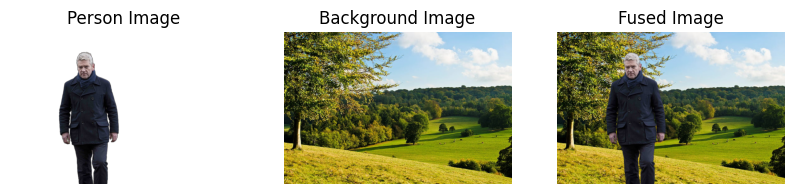

'fused_image.png'

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 读取人物抠图和背景图像
person_img = cv2.imread('person.png', cv2.IMREAD_UNCHANGED)
background_img = cv2.imread('background.jpg')

# 检查图像尺寸是否匹配，如果不匹配，调整背景图像的尺寸
if person_img.shape[:2] != background_img.shape[:2]:
    background_img = cv2.resize(background_img, (person_img.shape[1], person_img.shape[0]))

# 分离人物抠图中的Alpha通道
b, g, r, a = cv2.split(person_img)

# 创建一个三通道的图像用于混合
foreground = cv2.merge((b, g, r))
alpha = cv2.merge((a, a, a)) / 255.0

# 融合图像
fused_image = cv2.convertScaleAbs(foreground * alpha + background_img * (1 - alpha))

# 保存生成的图像
output_path = 'fused_image.png'
cv2.imwrite(output_path, fused_image)

# 可视化结果
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title('Person Image')
plt.imshow(cv2.cvtColor(person_img, cv2.COLOR_BGRA2RGBA))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Background Image')
plt.imshow(cv2.cvtColor(background_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Fused Image')
plt.imshow(cv2.cvtColor(fused_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

output_path


download model link https://drive.usercontent.google.com/downloadid=1ao1ovG1Qtx4b7EoskHXmi2E9rp5CHLcZ&export=download&authuser=0